# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

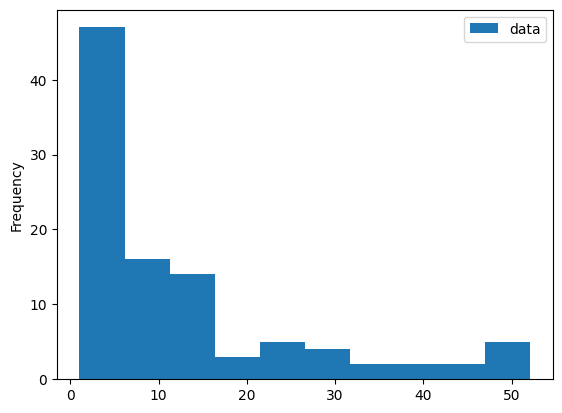

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

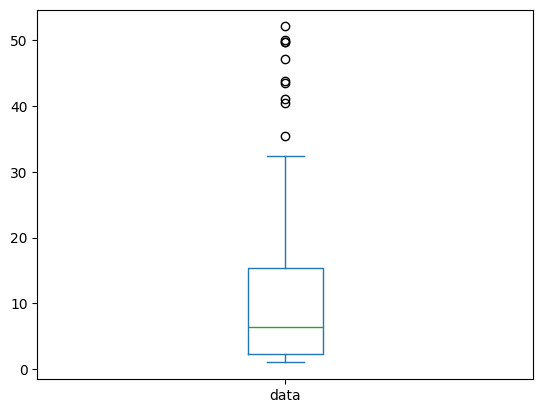

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/awelahi-bu/DX699-O2-semester-2/refs/heads/main/AI_in_HealthCare_Dataset.csv"
df = pd.read_csv(url)



In [6]:
print("Shape:", df.shape)
display(df.head())

Shape: (5000, 20)


,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,NaN,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850


In [8]:
# -----------------------------
# Basic Info + Missing Values
# -----------------------------

print("\nINFO:")
df.info()

print("\nMissing values (count):")
print(df.isna().sum())


INFO:
<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               5000 non-null   int64  
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   str    
 3   Blood_Pressure           5000 non-null   float64
 4   Heart_Rate               5000 non-null   float64
 5   Temperature              5000 non-null   float64
 6   Diagnosis                5000 non-null   str    
 7   Medication               5000 non-null   str    
 8   Treatment_Duration       5000 non-null   int64  
 9   Insurance_Type           5000 non-null   str    
 10  Doctor_Name              5000 non-null   str    
 11  Hospital_Name            5000 non-null   str    
 12  Lab_Test_Results         5000 non-null   float64
 13  X-ray_Results            5000 non-null   str    
 14  Surgery_Type             500

In [9]:
# -----------------------------
# Helper: numeric summary
# -----------------------------
def numeric_summary(series):
    """Return key univariate stats for a numeric pandas Series."""
    s = series.dropna()
    # mode can have multiple values; we’ll take the first for reporting
    mode_vals = s.mode()
    mode_val = mode_vals.iloc[0] if len(mode_vals) > 0 else np.nan

    summary = {
        "count": int(s.count()),
        "mean": float(s.mean()),
        "median": float(s.median()),
        "mode": float(mode_val) if pd.notna(mode_val) else np.nan,
        "std": float(s.std()),
        "min": float(s.min()),
        "max": float(s.max()),
        "q1": float(s.quantile(0.25)),
        "q3": float(s.quantile(0.75)),
        "iqr": float(s.quantile(0.75) - s.quantile(0.25)),
        "skew": float(s.skew()),
    }
    return pd.Series(summary)

In [10]:
# -----------------------------
# Univariate analysis: numeric columns
# -----------------------------
numeric_cols = [
    "Age",
    "Blood_Pressure",
    "Heart_Rate",
    "Temperature",
    "Lab_Test_Results",
    "Treatment_Duration",
    "Recovery_Time",
    "Patient_Satisfaction",
    "AI_Diagnosis_Confidence"
]

summary_table = pd.DataFrame({col: numeric_summary(df[col]) for col in numeric_cols}).T
display(summary_table)

,count,mean,median,mode,std,min,max,q1,q3,iqr,skew
Age,5000.0,53.433200,53.000000,21.000000,20.931669,18.000000,89.000000,35.000000,72.000000,37.000000,0.004860
Blood_Pressure,5000.0,119.863621,119.772157,61.940115,15.055656,61.940115,168.092063,109.896065,129.893989,19.997924,-0.024598
Heart_Rate,5000.0,74.755327,75.000152,36.760595,9.974505,36.760595,117.198456,67.935319,81.556148,13.620828,-0.018571
Temperature,5000.0,98.603710,98.618301,94.930131,1.002509,94.930131,102.497318,97.929791,99.265743,1.335951,-0.004276
Lab_Test_Results,5000.0,100.201480,100.473921,24.567602,19.813474,24.567602,168.340588,86.769592,113.730522,26.960930,-0.002264
Treatment_Duration,5000.0,14.965400,15.000000,1.000000,8.403495,1.000000,29.000000,8.000000,22.000000,14.000000,-0.014700
Recovery_Time,5000.0,4.944200,5.000000,2.000000,2.570994,1.000000,9.000000,3.000000,7.000000,4.000000,0.035296
Patient_Satisfaction,5000.0,2.993600,3.000000,4.000000,1.417731,1.000000,5.000000,2.000000,4.000000,2.000000,-0.007661
AI_Diagnosis_Confidence,5000.0,0.843927,0.843321,0.700017,0.084355,0.700017,0.989988,0.768968,0.917418,0.148450,0.017094


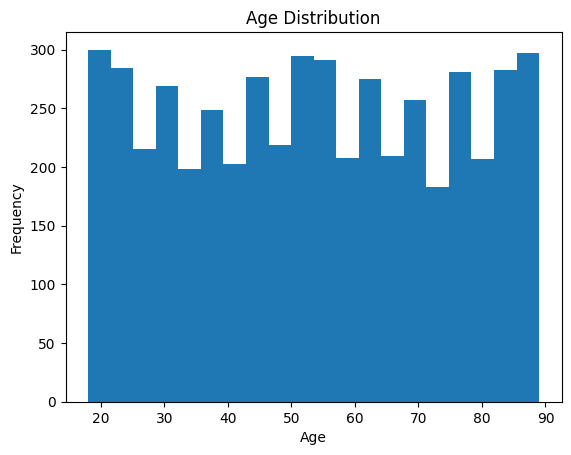

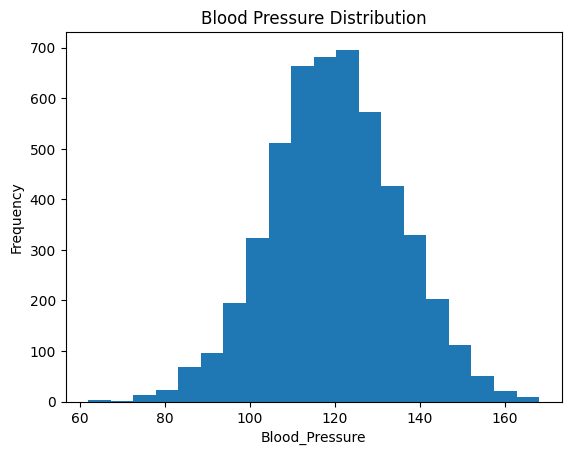

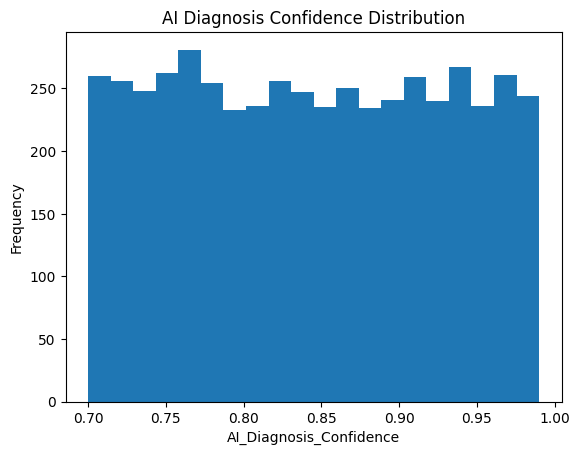

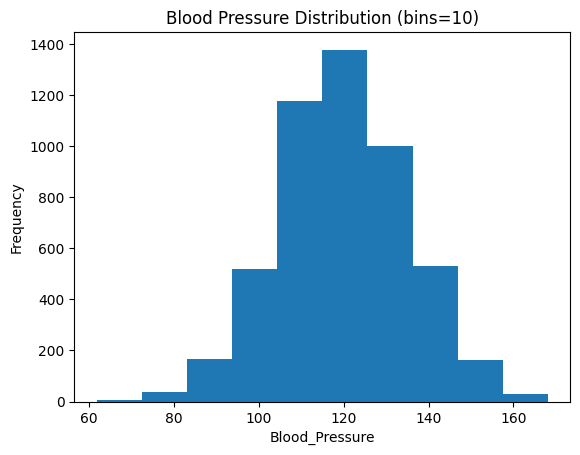

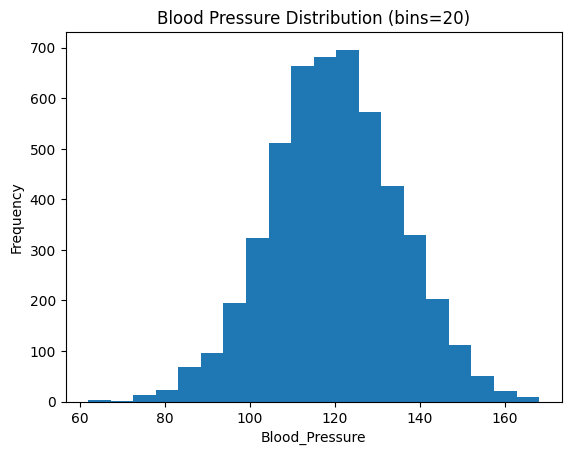

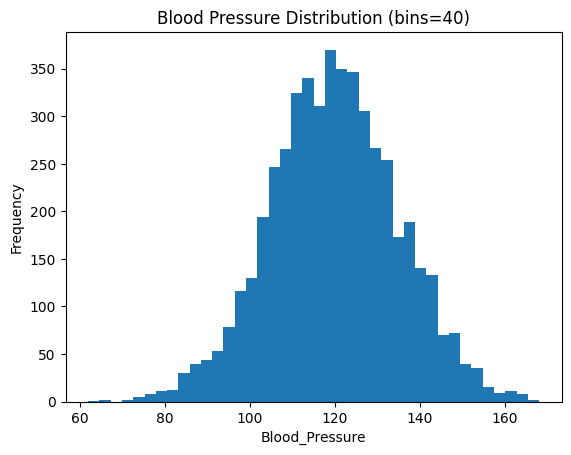

In [11]:
# -----------------------------
# Histograms for key numeric features
# -----------------------------
def plot_hist(series, title, bins=20):
    plt.figure()
    plt.hist(series.dropna(), bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Frequency")
    plt.show()

plot_hist(df["Age"], "Age Distribution", bins=20)
plot_hist(df["Blood_Pressure"], "Blood Pressure Distribution", bins=20)
plot_hist(df["AI_Diagnosis_Confidence"], "AI Diagnosis Confidence Distribution", bins=20)

# -----------------------------
# 6) Show how bin size changes interpretation
# -----------------------------
for b in [10, 20, 40]:
    plot_hist(df["Blood_Pressure"], f"Blood Pressure Distribution (bins={b})", bins=b)

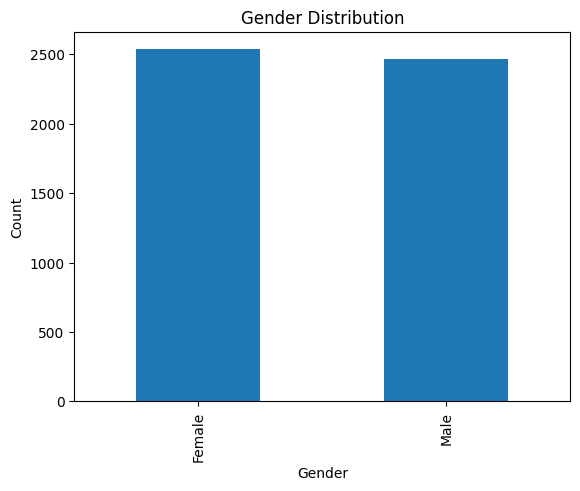

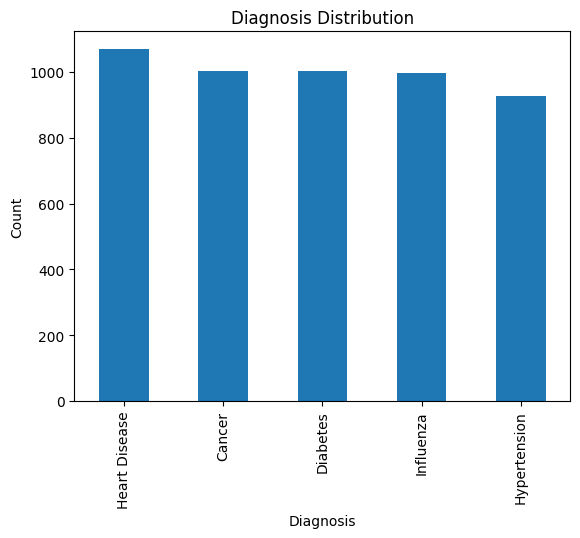

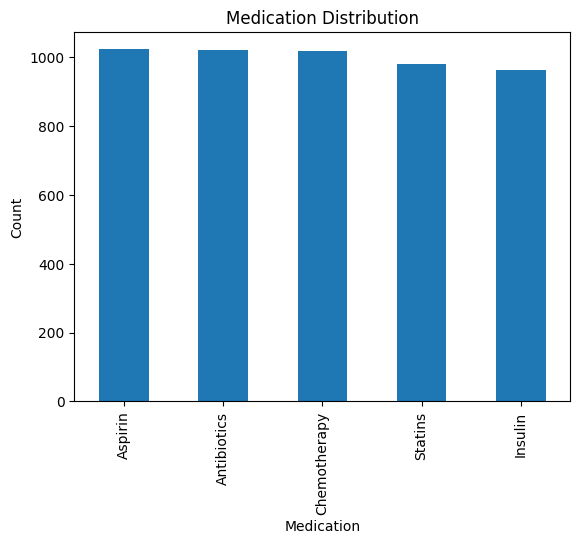

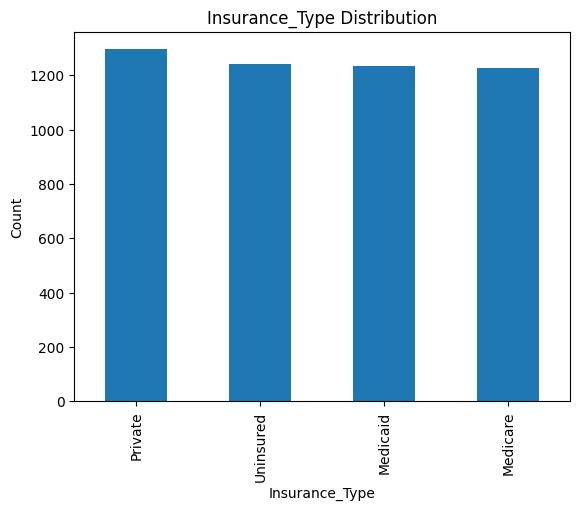

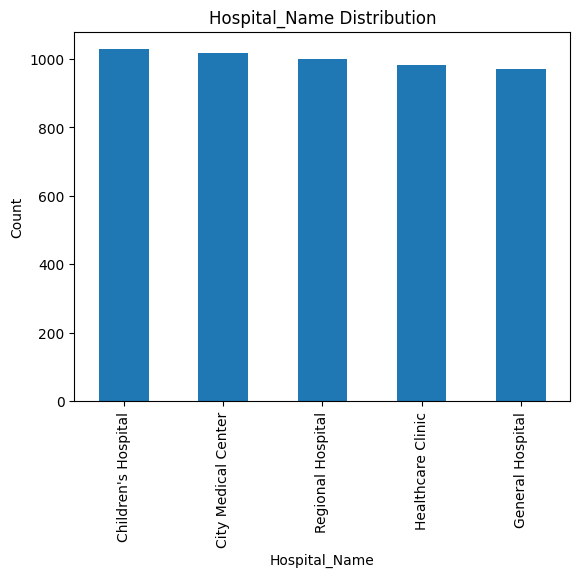

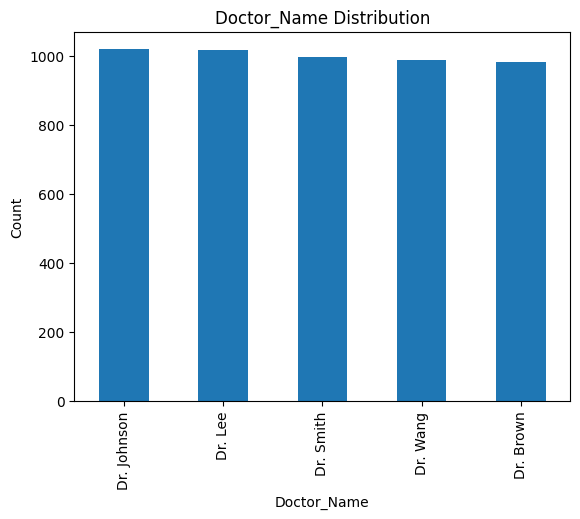

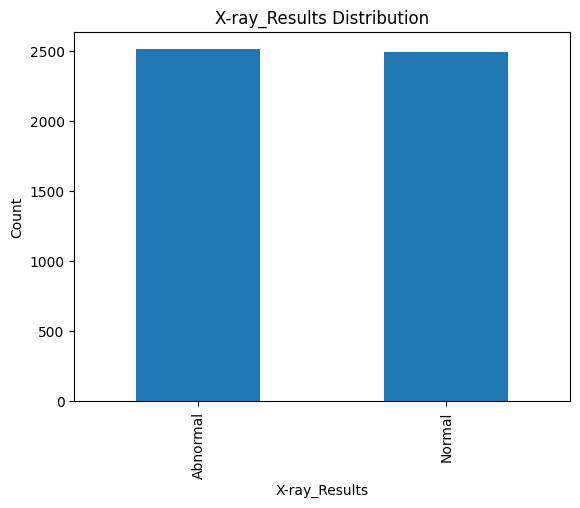

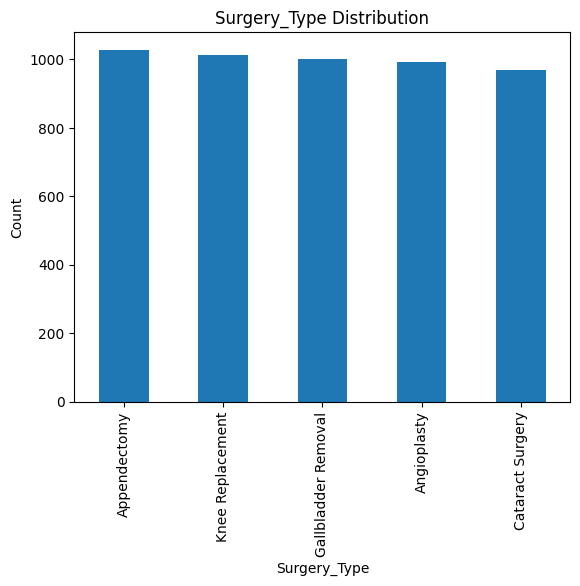

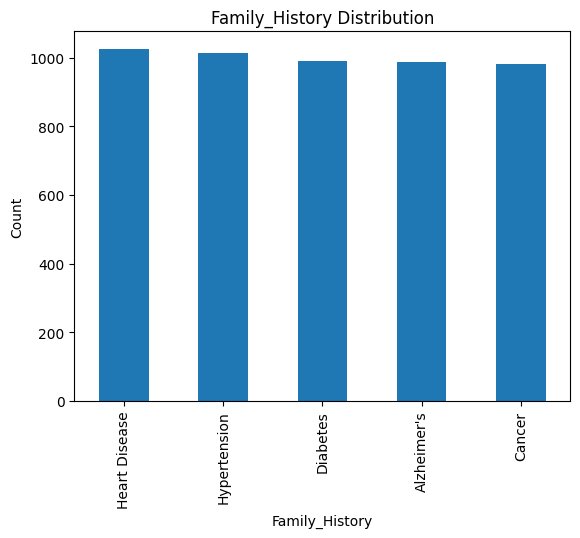

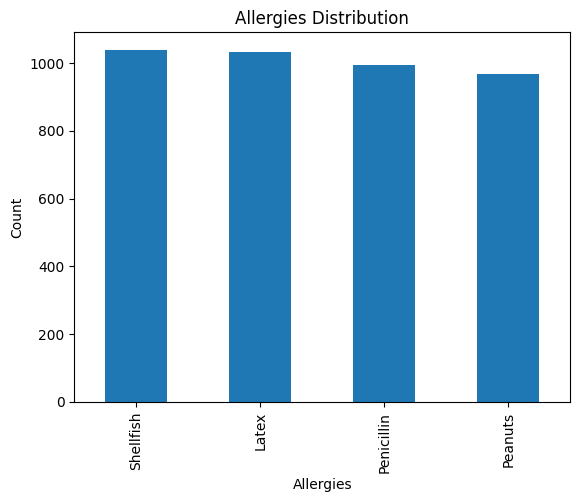

In [12]:
# -----------------------------
# Categorical distributions (Bar Plots)
# -----------------------------
def plot_bar_counts(series, title):
    plt.figure()
    series.value_counts().plot(kind="bar")
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.show()

cat_cols = [
    "Gender",
    "Diagnosis",
    "Medication",
    "Insurance_Type",
    "Hospital_Name",
    "Doctor_Name",
    "X-ray_Results",
    "Surgery_Type",
    "Family_History",
    "Allergies"
]

for col in cat_cols:
    plot_bar_counts(df[col], f"{col} Distribution")

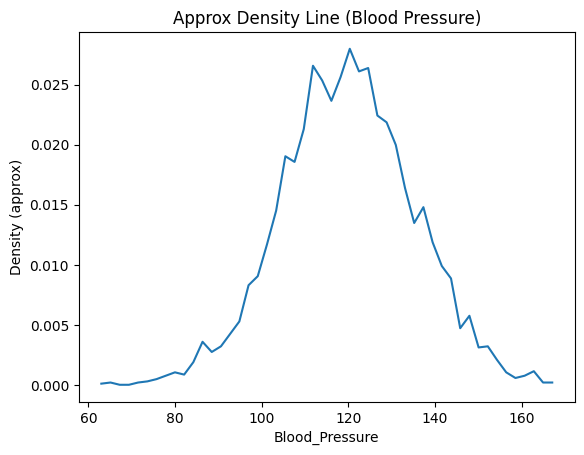

In [25]:
# -----------------------------
# "Variants" like KDE/Violin/Swarm 
#    We'll do a simple density-style line using numpy histogram (approx KDE alternative)
# -----------------------------
def density_line(series, title, bins=50):
    s = series.dropna().values
    counts, edges = np.histogram(s, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2

    plt.figure()
    plt.plot(centers, counts)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Density (approx)")
    plt.show()

density_line(df["Blood_Pressure"], "Approx Density Line (Blood Pressure)")

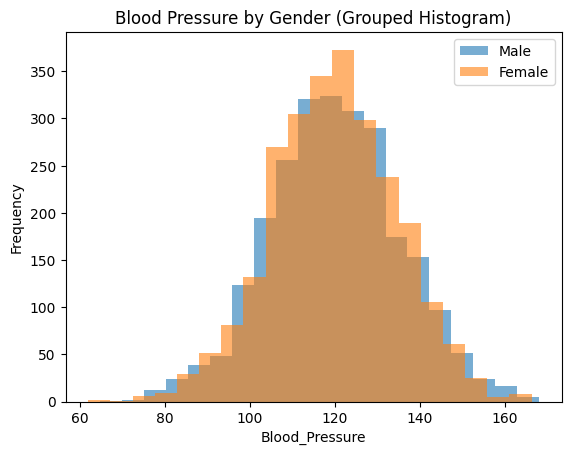

In [14]:
# -----------------------------
# Grouped histogram example (Blood Pressure by Gender)
# -----------------------------
plt.figure()
plt.hist(df.loc[df["Gender"] == "Male", "Blood_Pressure"].dropna(), bins=20, alpha=0.6, label="Male")
plt.hist(df.loc[df["Gender"] == "Female", "Blood_Pressure"].dropna(), bins=20, alpha=0.6, label="Female")
plt.title("Blood Pressure by Gender (Grouped Histogram)")
plt.xlabel("Blood_Pressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [15]:
# -----------------------------
# Simple outlier check (IQR rule) for Blood Pressure
# -----------------------------
bp = df["Blood_Pressure"].dropna()
q1, q3 = bp.quantile(0.25), bp.quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
outliers = bp[(bp < lower) | (bp > upper)]

print("Blood Pressure IQR Outlier Rule")
print("Q1:", q1, "Q3:", q3, "IQR:", iqr)
print("Lower bound:", lower, "Upper bound:", upper)
print("Outlier count:", outliers.shape[0])

Blood Pressure IQR Outlier Rule
Q1: 109.8960653533421 Q3: 129.8939889763805 IQR: 19.997923623038417
Lower bound: 79.89917991878447 Upper bound: 159.89087441093812
Outlier count: 49


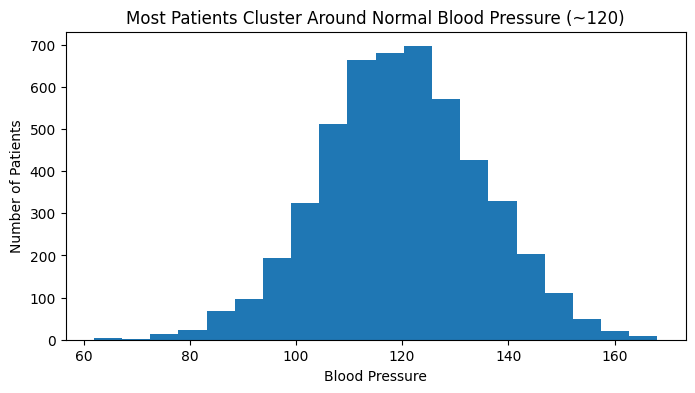

In [20]:
# -----------------------------
# STORYTELLING GRAPH RECREATION
# -----------------------------
plt.figure(figsize=(8, 4))
plt.hist(df["Blood_Pressure"].dropna(), bins=20)
plt.title("Most Patients Cluster Around Normal Blood Pressure (~120)")
plt.xlabel("Blood Pressure")
plt.ylabel("Number of Patients")
plt.show()

In [21]:

# -----------------------------
#interpretation lines
# -----------------------------
print("\n--- Quick Interpretation Notes ---")
print("Age: Broad adult range (18–89), roughly even coverage, no extreme outliers.")
print("Blood Pressure: Roughly normal around ~120, realistic spread, few extremes.")
print("AI Confidence: Mostly high (0.70–0.99), fairly even spread, indicates consistent model confidence.")
print("Diagnosis/Gender: Fairly balanced categories; gender split is close to 50/50.")


--- Quick Interpretation Notes ---
Age: Broad adult range (18–89), roughly even coverage, no extreme outliers.
Blood Pressure: Roughly normal around ~120, realistic spread, few extremes.
AI Confidence: Mostly high (0.70–0.99), fairly even spread, indicates consistent model confidence.
Diagnosis/Gender: Fairly balanced categories; gender split is close to 50/50.


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

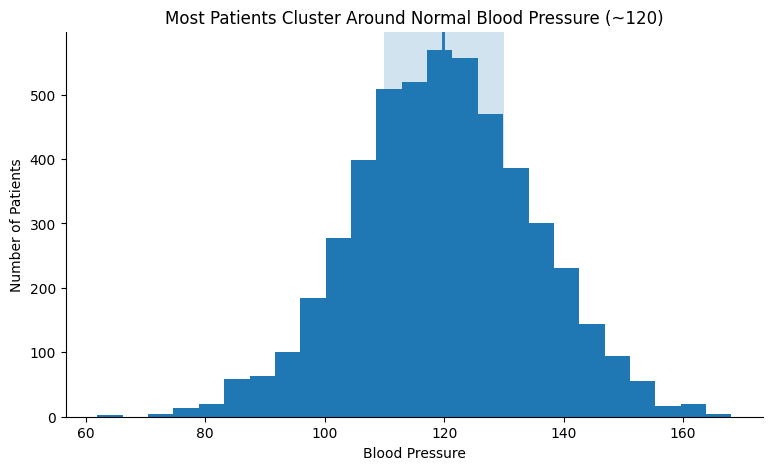

In [24]:
bp = df["Blood_Pressure"]

plt.figure(figsize=(9,5))

# Main histogram
counts, bins, patches = plt.hist(bp, bins=25)

# Highlight normal BP region (approx 110–130)
plt.axvspan(110, 130, alpha=0.2)

# Add vertical line at mean
mean_bp = bp.mean()
plt.axvline(mean_bp, linewidth=2)

# Clean formatting
plt.title("Most Patients Cluster Around Normal Blood Pressure (~120)")
plt.xlabel("Blood Pressure")
plt.ylabel("Number of Patients")

# Remove top and right borders for cleaner look
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

** STORYTELLING **


**This graph applies storytelling principles by focusing attention on the main insight: most patients fall within the normal blood pressure range (110–130). Instead of overwhelming the viewer with unnecessary colors or gridlines, the design removes clutter and highlights the key region using subtle shading. The vertical line marks the average blood pressure, reinforcing the central tendency. The goal is not just to show data, but to clearly communicate the health stability of the patient population.**